In [1]:
#Allows charts to appear in the notebook
%matplotlib inline

#libraries for analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,n_jobs=-1)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
#Read data from spreadsheet
df = pd.read_csv("2017_LoanData - Copy - Cat.csv", header=0, index_col=None)
df.head()

,grade,Years_At_Present_Employment,Housing,loan_status,dti,Delinquency,Collections,Derogatory
0,2,10,MORTGAGE,Current,11.52,1,0,0
1,2,4,RENT,Current,13.43,0,0,0
2,3,10,MORTGAGE,Current,31.07,0,0,0
3,5,10,MORTGAGE,Current,6.06,0,0,0
4,3,4,OWN,Current,17.48,0,0,0


In [3]:
# change the categorical data to binary
df_X = df.drop("loan_status", axis=1)
df_X = pd.get_dummies(df_X)
df_X.head()

,grade,Years_At_Present_Employment,dti,Delinquency,Collections,Derogatory,Housing_MORTGAGE,Housing_OWN,Housing_RENT
0,2,10,11.52,1,0,0,1,0,0
1,2,4,13.43,0,0,0,0,0,1
2,3,10,31.07,0,0,0,1,0,0
3,5,10,6.06,0,0,0,1,0,0
4,3,4,17.48,0,0,0,0,1,0


In [4]:
# sorting y or to be predicted labels
df_y = df["loan_status"]
df_y = pd.get_dummies(df_y)
current_labels = df_y["Current"].values
print(current_labels)

[1 1 1 ... 1 1 1]


In [5]:
# checking the default values in the dataset to ensure that ML model predicts more than just the random pick
nd,d = df["loan_status"].value_counts()
print(f'{d}, {nd}, {nd/(d+nd)*100}%')

77337, 365843, 82.54952840832168%


In [6]:
# define X and y
X = df_X.values
y = current_labels

In [7]:
# split the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
# normalize the input data
# X_tr_scaler = normalize(X_train, axis=1)
# X_tst_scaler = normalize(X_test, axis=1)


In [ ]:
# %%time
# # create and fit a logistic regression model
# from sklearn.metrics import accuracy_score
# pipeline_model = make_pipeline(StandardScaler(), classifier)
# pipeline_model.fit(X_train, y_train)

In [8]:
%%time
# create and fit a random forest model
from sklearn.metrics import accuracy_score
pipeline_model = make_pipeline(StandardScaler(), rf)
pipeline_model.fit(X_train, y_train)

Wall time: 32 s


In [9]:
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [10]:
predictions_tr = pipeline_model.predict(X_train)
print(accuracy_score(predictions_tr, y_train))

0.9897438211712322


In [11]:
predictions = pipeline_model.predict(X_test)
print(accuracy_score(predictions, y_test))

0.92957263414414


In [12]:
# calculate feature importance, less important features may be ignored
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, df_X.columns), reverse=True)

[(0.27698068615351856, 'dti'),
 (0.24474033858965352, 'grade'),
 (0.21452670169628163, 'Derogatory'),
 (0.14111996504136343, 'Collections'),
 (0.10758993890885156, 'Delinquency'),
 (0.012678749187204347, 'Years_At_Present_Employment'),
 (0.0010194640033150163, 'Housing_MORTGAGE'),
 (0.0009475206369238366, 'Housing_RENT'),
 (0.0003966357828879942, 'Housing_OWN')]

In [13]:
print(df_X.columns.tolist())
print(X_train[0])

['grade', 'Years_At_Present_Employment', 'dti', 'Delinquency', 'Collections', 'Derogatory', 'Housing_MORTGAGE', 'Housing_OWN', 'Housing_RENT']
[ 1.   10.   15.44  0.    0.    0.    1.    0.    0.  ]


In [14]:
yy = [[ 1.  , 10.  , 80,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ]]
print(pipeline_model.predict(yy))

[1]


In [17]:
# plot roc curve and calculate area under the curve
from sklearn.metrics import roc_curve, auc
# y_score = pipeline_model.fit(X_train, y_train).decision_function(X_test) #for LR and SVM
y_score = pipeline_model.fit(X_train, y_train).predict(X_test) #for RF
fpr, tpr, _ = roc_curve(y_test, y_score)
# fpr, tpr = roc_curve(y_test, y_score[0])
roc_auc = auc(fpr,tpr)

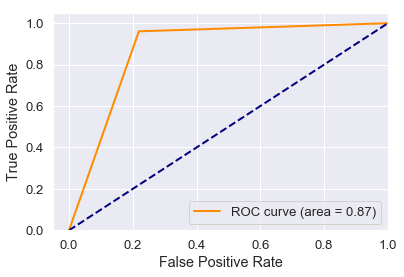

In [18]:
# plot fpr and tpr values
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Good value of area under roc curve proves that the model is doing a decent job of prediction